# Regression using gradient descent

In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
# load the dataset
# Data is in txt format placed inside data directory
#you can call the load_dat function from utils.py file

#________Your Code Here________ 

x_train, y_train = load_data_multi()

In [3]:
# print x_train
column1 = x_train[:, 0]    # as we have two inputs (2d array x train ) so to seprate the data of first column 
column2 = x_train[:, 1]        # as we have two inputs (2d array x train ) so to seprate the data of 2nd  column in array
x1_trainM = np.array(column1 )
x2_trainM = np.array(column2)
x1_trainM=x1_trainM/1000   # as you did in previous Y divide by some value becasue the data was too big to show in grAph

print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 


# Creating separate NumPy arrays


Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  
y_train=y_train/100000    # as you did in previous Y divide by some value becasue the data was too big to show in grAph

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [399900. 329900. 369000. 232000. 539900.]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of x1_trainM is:', x1_trainM.shape)
print ('The shape of x2_trainM is:', x2_trainM.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (47, 2)
The shape of x1_trainM is: (47,)
The shape of x2_trainM is: (47,)
The shape of y_train is:  (47,)
Number of training examples (m): 47


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

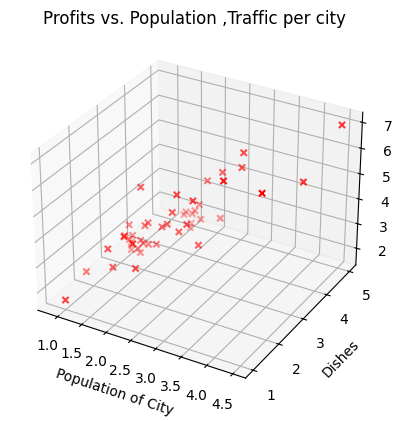

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # for 3d graph as we have 3 arrameter to deal
ax.scatter(x1_trainM, x2_trainM, y_train, marker='x', c='r')

# Set the title
ax.set_title("Profits vs. Population ,Traffic per city")  #considering 2nd input as traffic
# Set the z-axis label
ax.set_zlabel('Profit ')
# Set the x-axis label
ax.set_xlabel('Population of City ')
# Set the y-axis label
ax.set_ylabel('Dishes')

plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

In [7]:
# UNQ_C1
# GRADED FUNCTION: compute_cost


                                                #w = 0_1 
                                                #b = 0
                                                #w2 =0_2
                                                
                                                
def compute_cost(x1,x2, y, w,w2, b): #add x2 2nd input a parameter
   
    # number of training examples
    m = x1.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    #_________DONT USE FOR LOOPS HERE USE VACTORIZATION INSTEAD ______ 

    ### START CODE HERE ###
    pred = w * x1 +w2 *x2 + b      # as now we have two input so the prediction will be mx1+mx2+c
    #formula of the mean squared error
    mse =  sum((pred - y) *(pred - y))
    total_cost=mse/(2*m)
    ### END CODE HERE ### 

    return total_cost

You can check if your implementation was correct by running the following test code:

In [8]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1
initial_w2= 2
cost = compute_cost(x1_trainM,x2_trainM, y_train, initial_w, initial_w2,initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
#compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 33.477


<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [9]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x1,x2, y, w,w2, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x1.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    dj_dw2=0
    
    ### START CODE HERE ###
    pred = w * x1+w2*x2 + b    #0_1*x 1+0_2*x2 +0  (prediction )
     # now as given above formula calculating gradient
    db=np.sum(pred-y)    
    dw=np.sum((pred-y)*x1)
    dw2=np.sum((pred-y)*x2)
    # now as given above formula calculating total gradient update
    dj_dw=dw/(m)
    dj_db=db/(m)
    dj_dw2=dw2/(m)
    ### END CODE HERE ### 
   
    return dj_dw,dj_dw2, dj_db

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
initial_w2= 0

tmp_dj_dw,tmp_dj_dw2, tmp_dj_db = compute_gradient(x1_trainM,x2_trainM, y_train, initial_w,initial_w2, initial_b)
print('Gradient at initial w, w2 ,b (zeros):', tmp_dj_dw,tmp_dj_dw2 ,tmp_dj_db)



Gradient at initial w, w2 ,b (zeros): -7.6420912819148965 -11.203677021276595 -3.404126595744681


In [11]:
# Compute and display cost and gradient with non-zero w

test_w = 0.2
test_b = 0.2
test_w2 = 0.2
tmp_dj_dw, tmp_dj_dw2,tmp_dj_db = compute_gradient(x1_trainM,x2_trainM, y_train, test_w,test_w2 ,test_b)

print('Gradient at test w,w2, b:', tmp_dj_dw,tmp_dj_dw2, tmp_dj_db)

Gradient at test w,w2, b: -4.982983171276596 -7.1114259574468095 -2.1699478723404257


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

### Exercise 3 

    Update the values of w and b
    

In [12]:
def gradient_descent(x1,x2, y, w_in, b_in,w2_in, cost_function, gradient_function, alpha, num_iters): #introduce x1,x2,w2 as parameters
    
    
    # number of training examples
    m = len(x1)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w2_history = []  #w2 history 
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w2=w2_in
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw,dj_dw2, dj_db = gradient_function(x1,x2, y, w,w2, b )  


        # Update Parameters using w, b, alpha and gradient
        #_________your code here_________
        ### START CODE HERE ###
        b=b-(alpha*dj_db)   #0=0-(alpha)*summation of partial derivative with respect to 0 update
        w=w-(alpha*dj_dw)   #01=01-(alpha)*summation of partial derivative with respect to 01  update
        w2=w2-(alpha*dj_dw)  #02=02-(alpha)*summation of partial derivative with respect to 0  update
        ### END CODE HERE ###
             



        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x1,x2, y, w,w2, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w,w2, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

Iteration    0: Cost     6.40   
Iteration  150: Cost     0.46   
Iteration  300: Cost     0.35   
Iteration  450: Cost     0.35   
Iteration  600: Cost     0.35   
Iteration  750: Cost     0.35   
Iteration  900: Cost     0.35   
Iteration 1050: Cost     0.35   
Iteration 1200: Cost     0.35   
Iteration 1350: Cost     0.35   
w,,w2, b found by gradient descent: 0.6516283659156423 0.6516283659156423 0.13226742639366582


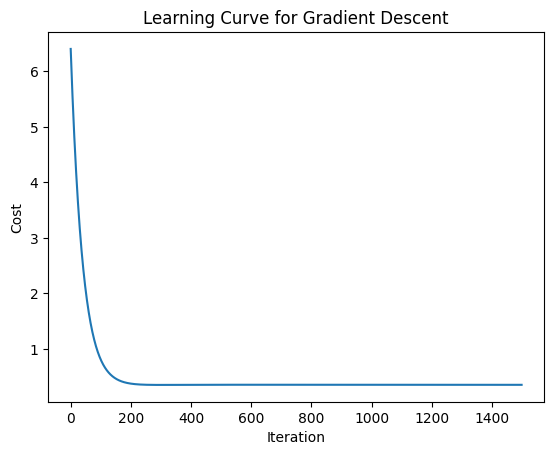

In [13]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.
initial_w2 = 0.
# some gradient descent settings
iterations = 1500

alpha = 0.001

w,w2,b,J_history,_ = gradient_descent(x1_trainM,x2_trainM ,y_train, initial_w, initial_w2, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,,w2, b found by gradient descent:", w, w2, b)

#To get the basic idea of how the cost function varies with the parameters,
# Plot the learning curve
plt.plot(range(iterations), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning Curve for Gradient Descent')
plt.show()

### Exercise 4

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [14]:
m = x_train.shape[0]
predicted = np.zeros(m)

#use vectorization to compute predicted values
#_________your code here_________
### START CODE HERE ###
#print(predicted)
predicted= w*x1_trainM+w2*x2_trainM +b    #as we created it as np array with zeros  x_train is also array so it will do calculation index wise 
#print(predicted)
### END CODE HERE ###


We will now plot the predicted values to see the linear fit.

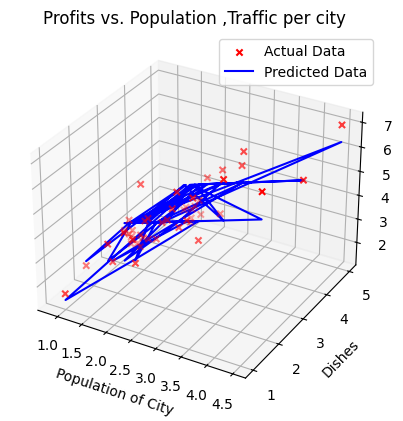

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # for 3d graph as we have 3 arrameter to deal
ax.scatter(x1_trainM, x2_trainM, y_train, marker='x', c='r', label='Actual Data')

# Plot the predicted data as a line
ax.plot(x1_trainM, x2_trainM, predicted, c="b", label='Predicted Data')

# Set the title
ax.set_title("Profits vs. Population ,Traffic per city")
# Set the z-axis label
ax.set_zlabel('Profit ')
# Set the x-axis label
ax.set_xlabel('Population of City ')
# Set the y-axis label
ax.set_ylabel('Dishes')

# Show the legend
ax.legend()

plt.show()

**Congratulations on completing this lab on linear regression!**


#### ©️ Andrew ng
